<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Simulation_of_Acoustic_Fields_Generated_by_a_Moving_Source_Using_Lighthill's_Acoustic_Analogy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

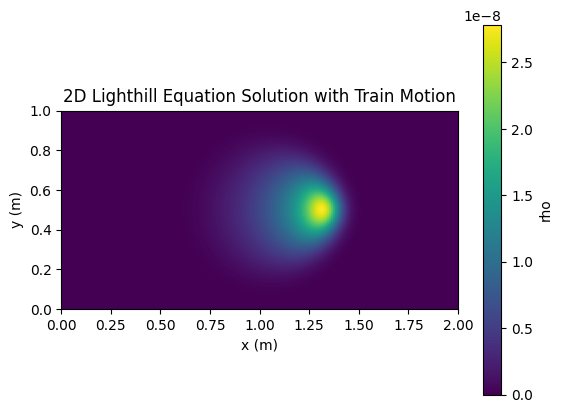

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c0 = 343  # Speed of sound in m/s
Lx = 2.0  # Length of the domain in x direction in meters
Ly = 1.0  # Length of the domain in y direction in meters
T = 0.01  # Total time in seconds
nx = 200  # Number of spatial points in x direction
ny = 100  # Number of spatial points in y direction
nt = 400  # Number of time steps

dx = Lx / (nx - 1)  # Spatial step size in x direction
dy = Ly / (ny - 1)  # Spatial step size in y direction
dt = 0.1 * min(dx, dy) / c0  # Time step size (ensuring stability)

# Initialize fields
rho = np.zeros((nx, ny))
rho_new = np.zeros((nx, ny))
rho_old = np.zeros((nx, ny))

# Source term: Gaussian function with train motion
def source_term(x, y, t, train_speed):
    x0, y0 = Lx / 2 + train_speed * t, Ly / 2
    sigma = 0.05
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2)) * np.sin(2 * np.pi * 100 * t)

# Train speed in m/s
train_speed = 300  # Example speed, adjust as needed

# Spatial grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Time-stepping loop
for n in range(1, nt):
    t = n * dt
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # Apply Lighthill's equation in its discrete form with moving source
            rho_new[i, j] = (2 * rho[i, j] - rho_old[i, j] +
                             (c0**2 * dt**2 / dx**2) * (rho[i+1, j] - 2 * rho[i, j] + rho[i-1, j]) +
                             (c0**2 * dt**2 / dy**2) * (rho[i, j+1] - 2 * rho[i, j] + rho[i, j-1]) +
                             dt**2 * source_term(x[i], y[j], t, train_speed))

    # Update fields
    rho_old = rho.copy()
    rho = rho_new.copy()

# Plotting the results
fig, ax = plt.subplots()
cax = ax.imshow(rho.T, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
ax.set_title('2D Lighthill Equation Solution with Train Motion')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
fig.colorbar(cax, ax=ax, label='rho')

plt.show()


Description for the Notebook
Title: 2D Simulation of Lighthill's Acoustic Analogy with Train Motion

Objective:
This notebook simulates the acoustic field generated by a moving source, such as the pantograph of a high-speed train, using Lighthill's Acoustic Analogy in a 2D domain. The primary goal is to visualize the impact of the train's motion on the symmetry of the generated sound field.

Key Components:

Parameters: Define the physical and simulation parameters including the speed of sound, domain dimensions, and grid resolution.
Source Term: Implement a Gaussian function modulated by a sine wave to represent the noise source. The source term moves with the train's speed.
Numerical Solution: Solve the wave equation using a finite difference method to update the density perturbation field over time.
Visualization: Plot the resulting density perturbation field to observe the impact of the moving source on the acoustic field.
Detailed Steps:

Initialization: Set up the simulation parameters, including domain size, grid resolution, and time steps.
Source Term Definition: Define a moving source term to simulate the noise generated by a pantograph in motion.
Time-Stepping Loop: Iteratively solve the 2D wave equation to update the density perturbation field using the finite difference method.
Plotting: Visualize the final state of the density perturbation field, highlighting the asymmetry caused by the train's motion.
Usage:
This notebook can be used to study the effects of moving noise sources in various applications, including transportation noise, environmental acoustics, and noise control engineering. It provides a foundational understanding of how motion affects sound propagation and can be extended to more complex geometries and flow conditions.